# Functional analysis of gene signatures

In this session we will analyze the differentially expressed genes found by DESeq2 on the bulk RNA-seq data, for the NETs case study. Two replicates of non-stimulated (NS) RNA-seq samples were compared with 2 replicates of stimulated (S) RNA-seq samples. 

The DESeq2 analysis resulted in a deseq.results.tsv file, which we will use here.

In [2]:
mkdir -p /mnt/storage/r0639760/jupyternotebooks/Assignment/FunctionalAnalysis/
cd /mnt/storage/r0639760/jupyternotebooks/Assignment/FunctionalAnalysis/

In [3]:
ln -sf /mnt/storage/r0639760/jupyternotebooks/Assignment/DeSeq/deseq.results.tsv deseq #give name to symbolic link

In [4]:
#insert Gene in first position of first line, use if clause to no not add 'Gene' repeatedly 
FIRST=$(head -n1 deseq |cut -f1) #no spaces otherwise bash thinks FIRST is a function

if [ -z $FIRST ]; #check if variable is empty
then
    sed -i '1s/^/Gene/' deseq # sed -i s/regexp/replacement/
fi
echo $FIRST #print to confirm

In [5]:
head deseq

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
PTGS2	6438.53684155002	4.7999666488876	0.11592716458007	41.4050206979079	0	0
MMP3	52152.0165834778	9.87108725114087	0.136934138714302	72.0863865199883	0	0
CCL2	17736.1710914414	4.84704222639936	0.0983299939690035	49.2936288384935	0	0
NPTX1	10004.2035762277	-5.66152704301313	0.114287841051136	-49.5374397743676	0	0
SLC14A1	3164.24419119919	-5.04343799157252	0.130655277197577	-38.6011043698283	0	0
PID1	5400.25841708525	4.55453371640073	0.115605481677191	39.3972124013851	0	0
RCAN1	23871.7376503437	4.16676261960606	0.0982997445410506	42.3883361961942	0	0
LIF	6856.64466840609	5.67894970295766	0.137207007981235	41.389647558923	0	0
IL8	109147.236841904	11.3535183303187	0.152000083734821	74.6941583935313	0	0


In [6]:
head -1 deseq
grep -n IL1B deseq
grep -n IL33 deseq
grep -n CXCL6 deseq

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
111:IL1B	490.168308308779	6.54963497227801	0.356064082501598	18.3945398992852	1.45288869418439e-75	2.1481619747468e-73
15:IL33	5208.00762088762	6.27759582295824	0.137412727760309	45.684238463764	0	0
11:CXCL6	297547.799208431	10.9193228484067	0.110641213069158	98.6912791852828	0	0


## Use arbitrary thresholds to create lists of up- and down-regulated genes
* careful: there are a lot of genes without detected expression, they have NA in the logFC column; so column 3 ($3) should not be "NA" 
* we're using awk to filter this file, selecting only rows where the logFC (column 3, indicated by "\$3") is higher than a threshold; and the padj is lower than a threshold

In [7]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05' deseq| head

PTGS2	6438.53684155002	4.7999666488876	0.11592716458007	41.4050206979079	0	0
MMP3	52152.0165834778	9.87108725114087	0.136934138714302	72.0863865199883	0	0
CCL2	17736.1710914414	4.84704222639936	0.0983299939690035	49.2936288384935	0	0
PID1	5400.25841708525	4.55453371640073	0.115605481677191	39.3972124013851	0	0
RCAN1	23871.7376503437	4.16676261960606	0.0982997445410506	42.3883361961942	0	0
LIF	6856.64466840609	5.67894970295766	0.137207007981235	41.389647558923	0	0
IL8	109147.236841904	11.3535183303187	0.152000083734821	74.6941583935313	0	0
CXCL6	297547.799208431	10.9193228484067	0.110641213069158	98.6912791852828	0	0
CXCL1	56522.8272339524	10.0504899745143	0.137487324734591	73.1012112855931	0	0
CXCL3	12757.16534849	9.77422900888404	0.212949255691653	45.8993339851677	0	0


In [8]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq > up-logFC1-p05.txt

In [9]:
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq > down-logFC1-p05.txt

In [93]:
wc -l up-logFC1-p05.txt
wc -l down-logFC1-p05.txt
wc -l deseq

801 up-logFC1-p05.txt
698 down-logFC1-p05.txt
41864 deseq


In [94]:
up=$(wc -l down-logFC1-p05.txt | grep -oP "^\d+") 
down=$(wc -l up-logFC1-p05.txt | grep -oP "^\d+")
total=$(wc -l deseq | grep -oP "^\d+")

echo $up/$total*100| bc -l 
echo $down/$total*100| bc -l
echo $up/$total*100+$down/$total*100| bc -l

1.66730364991400726100
1.91333842919931205800
3.58064207911331931900


3.5% of the genes are differentially expressed, when using an arbritrary threshold of 2¹=2 times upregulation or 2-¹=0.5 equals 2 times downregulation and an adjusted p-value of less than 0.05.

The up and down regulated genes determined with an arbitrary cut-off were then used in **gprofiler** to check for enriched GO terms. 
For the upregulated gened the cytokine activity is among the molecular function that are more active in the fibroblasts containing NETS. But also signalling, which is likely to be related to the cytokine signalling.
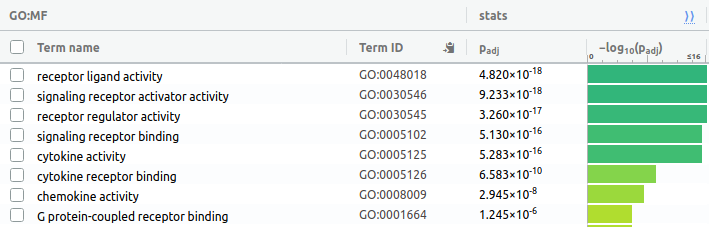

The GO terms related to biological processes that are enriched in the upregulated genes are responses to lipopolysaccharides and to bacterial infections. Which on first site might seem counter-intuitive but when thinking of the upregulated immune system then the NETs seem to trigger similar processes as lipoploysaccharides do on the cell membrane of bacteria.
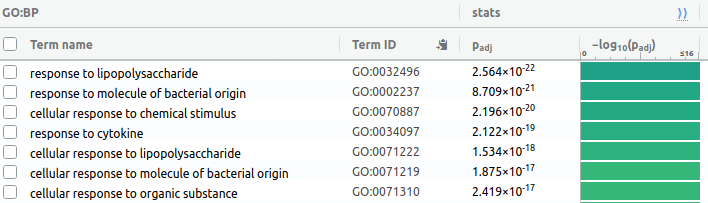

Most of the activities are happening in the extracellular space, which makes sense when thinking of the migration of the immune cells to the sites where the neutrophils are forming NETS and also the migration of the Neutrophils themselves.
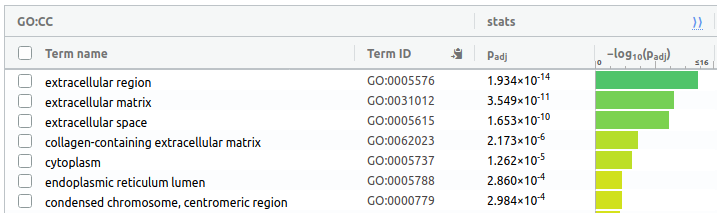

For the downregulated cells we see that genes are downregulated that are involved in protein binding but nothing immediately comes to mind that would explain why these genes are downregulated when the cell is upregulating inflammatory pathways.

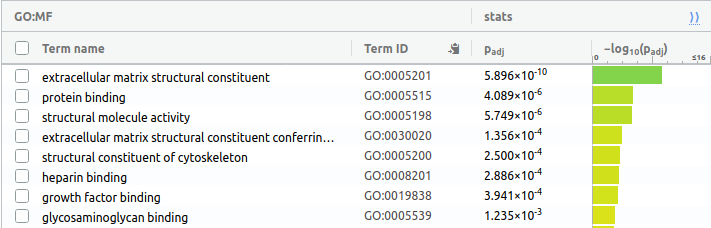

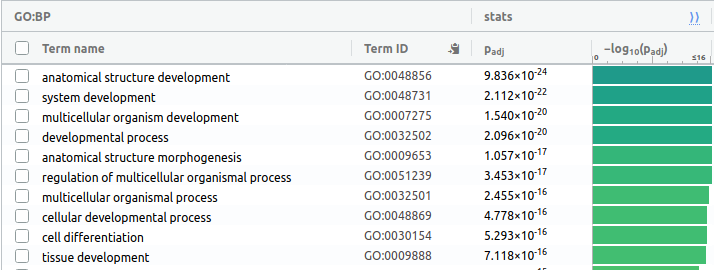

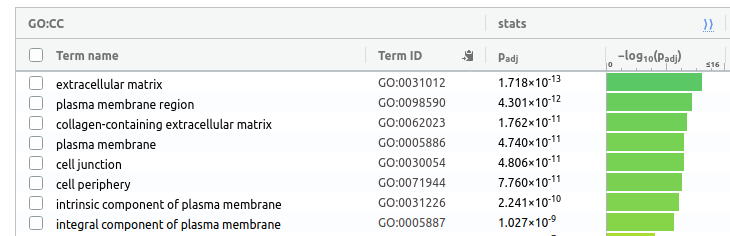

## Use the entire ranking to determine the "leading edge" instead of arbritrary thresholds

In [106]:
head -1 deseq

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj


In [207]:
#cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene | head
head -1 deseq |cut -f1 #
head deseq | cat |  sort -k 3gr | awk '$3 != "NA" {print $1}' | grep -v Gene

Gene
IL8
MMP3
LIF
CCL2
PTGS2
PID1
RCAN1
SLC14A1
NPTX1


### GOrilla - Gene Ontology enRIchment anaLysis and visuaLizAtion tool
The GOrilla tool requires a sorted list as input and is only looking at the top of the list, so we need ascendingly and descendingly sorted lists to check both up- and downregulated genes.

In [208]:
cat deseq.results.tsv | sort -k 3gr | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.sortFCdesc.txt

In [13]:
cat deseq | sort -k 3g | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.sortFCasc.txt

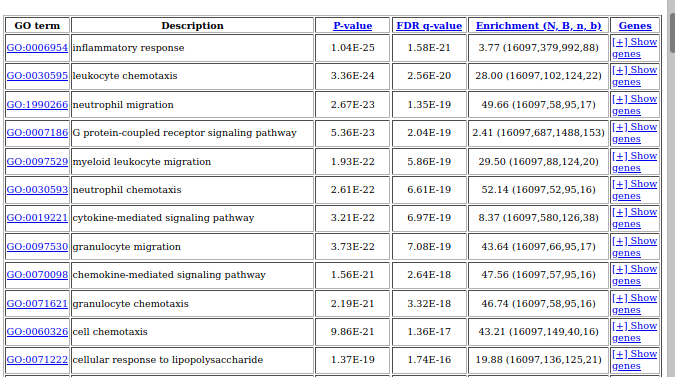

Many upregulated genes are involved in the inflammatory response, leukocyte chemotaxis and neutrophil migration. Those terms fit with the increased inflammation that was observed in the NET induced fibroblasts. Also Neutrophil migration is an expected GO term since neutrophils are the main players in Neutrophil Extracellular Traps (NETs). Cellular response to lipopolysaccharides is returned as GO term because NET formation is also a response to infection with Gram negative bacteria and the lipopolysaccharides expressed on their cell surface (Li et al, 2017, DOI: 10.1016/j.vetimm.2017.10.002). 
The Enrichment score is a ratio of ratios. For e.g. the genes linked to the Gene ontology (GO) term  "Neutrophil Migration" we find almost 50 times more often in the 95  most upregulated genes than in the entire annotated human genes. We also see that the cut-off is specific for each GO term. So we are not having one general cut-off but depending on the topic of interest we choose a different cut-off. For "Neutrophil Migration" the ideal cut-offis at 95 and not at 801 as above. Below a small demonstration of the calculation:

In [12]:
totalHumanGenes=16097
GenesForNeutrophil_Migration_total=58
CutOff=95
GenesForNeutrophil_Migration_CutOff=17

ratioCutOff=$(echo $GenesForNeutrophil_Migration_CutOff/$CutOff | bc -l)
ratioTotal=$(echo $GenesForNeutrophil_Migration_total/$totalHumanGenes | bc -l)
EnrichmentScore=$(echo $ratioCutOff/$ratioTotal | bc -l)

echo "The highest ratio of genes related to Neutrophil Migration response to all genes is $ratioCutOff"
echo "The ratio of genes related to Neutrophil Migration to all genes is $ratioTotal"
echo "The Enrichment score calculated as a ratio of ratios is: $EnrichmentScore"

The highest ratio of genes related to Neutrophil Migration response to all genes is .17894736842105263157
The ratio of genes related to Neutrophil Migration to all genes is .00360315586755296017
The Enrichment score calculated as a ratio of ratios is: 49.66406533575317616395


Below are the GO terms that are enriched among the downregulated genes.
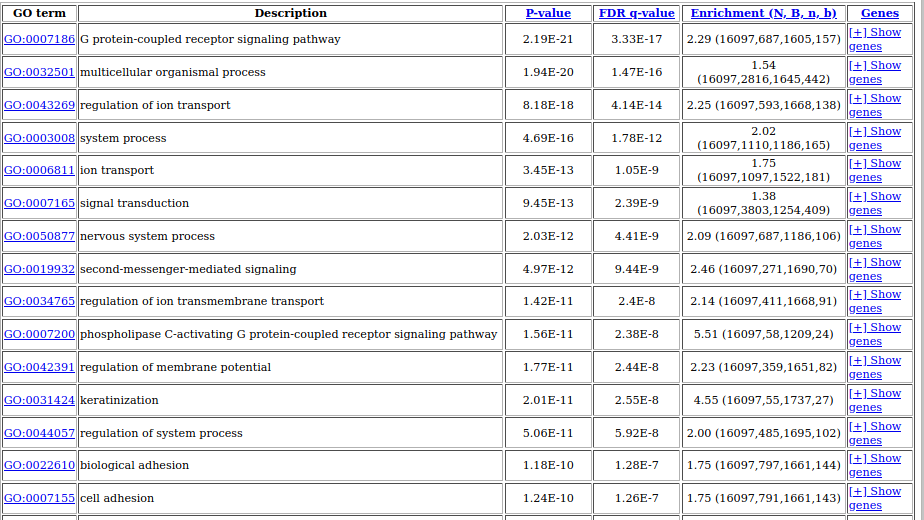

In [14]:
head deseq.sortFCasc.txt

ALDH3A1
PADI2
RP11-215H22.1
RP1-124C6.1
DHRS9
CTD-2553C6.1
SSTR5-AS1
KRT16
RP11-334A14.8
RP11-116O18.3


In [15]:
grep -n IL1B deseq.sortFCasc.txt
grep -n IL1B deseq.sortFCdesc.txt

24455:IL1B
37:IL1B


### GSEA : Gene Set Enrichment Analysis

GSEA is often used for a ranking-based enrichment analysis. We will use a standalone version of GSEA. The advantage of GSEA compared to GOrilla is that it only needs a ranked list and can determine both up- and downregulated genes from this single rank file.

* GSEA firstly needs file with the ranked genes, as a .rnk file (just a text file with .rnk extension) with 2 columns: the gene name and the logFC value (the value can also be another type of score, here we use the logFC value).
* GSEA also needs a collection of gene lists, such as gene lists representing GO categories, pathways, etc. For human analyses, lots of collections are available from MSigDB. This list does not need to be created by us but can be selected in the software or downloaded from MSigDB.

In [230]:
head deseq | sort -k 3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene

IL8 11.3535183303187
MMP3 9.87108725114087
LIF 5.67894970295766
CCL2 4.84704222639936
PTGS2 4.7999666488876
PID1 4.55453371640073
RCAN1 4.16676261960606
SLC14A1 -5.04343799157252
NPTX1 -5.66152704301313


In [231]:
cat deseq | sort -k 3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | tr ' ' '\t' > deseq.logFC.rnk

In [232]:
head deseq.logFC.rnk

CCL20	11.649566932159
IL8	11.3535183303187
CXCL5	11.0831179500813
CXCL6	10.9193228484067
C15orf48	10.4561304062441
CXCL9	10.1590564730342
CXCL1	10.0504899745143
MMP3	9.87108725114087
CXCL3	9.77422900888404
MMP12	9.72729241997724


GSEA analysis 
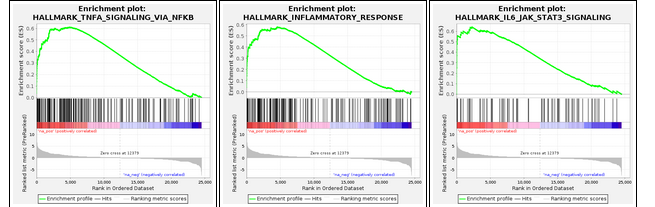

When using GSEA for gene set enrichment we see that genes related to the sets inflammatory response, signalling via NfkB and via Jak-Stat are enriched among the upregulated genes. The gene set database use was the "Hallmarks" database. The p-value is generated from a permuting the sorted list 1000 times (the default value) and never was an enrichment found by random that showed genes enriched at the top like shown here and so the p-value is 0 for all 3 gene sets.

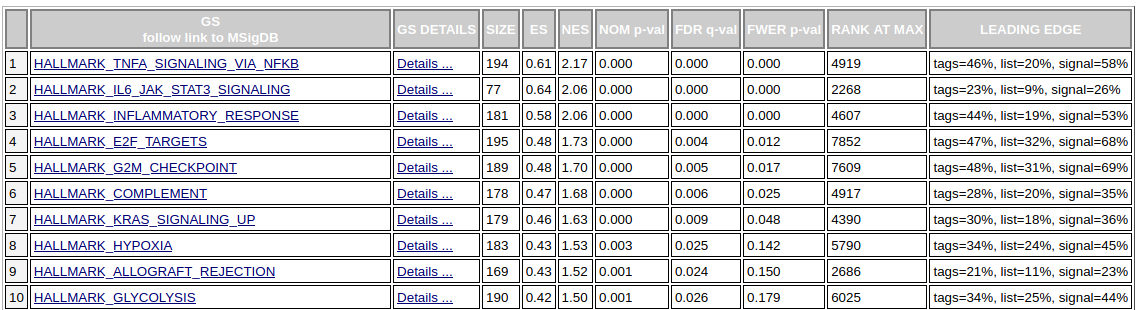

This is the list of upregulated genes when taking the maximum enrichment score as a cutoff for a certain gene set. We see that the cut-off is highly variable and depends on the gene set. This is in contrast to the arbritrary cut-off of 2 fold upregulation or 2 fold downregulation that resulted in 801 upregulated and 698 downregulated genes.

In [11]:
wc -l up-logFC1-p05.txt
wc -l down-logFC1-p05.txt
wc -l deseq

801 up-logFC1-p05.txt
698 down-logFC1-p05.txt
41864 deseq


Tried to investigate further if genes of a gene set for abnormal cartilage morphology was enriched and there seems to be some enrichment but it is not significant.
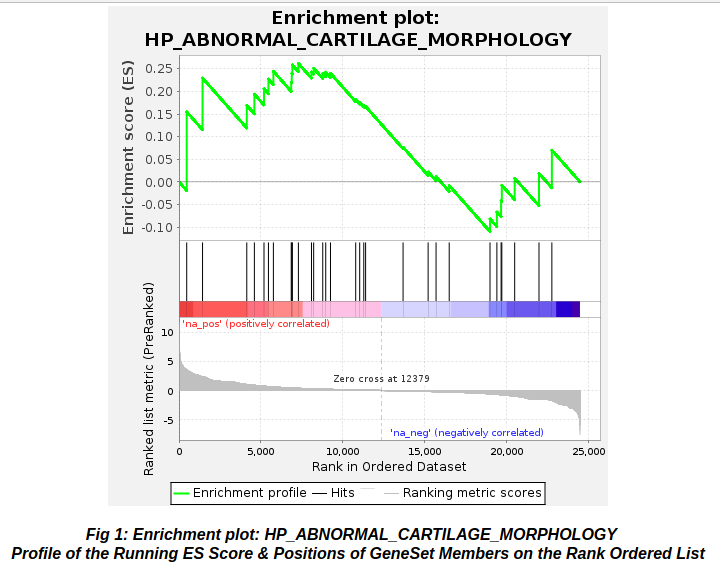

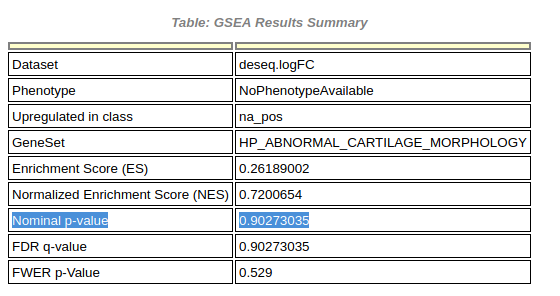

# Motif discovery ; upstream TF identification
## Using Cytoscape and iRegulon

For Motif discovery the background and foreground are compared. Background is the entire genome and we count how often does a motif occur. Then we divide by the number of nucleotides. Then we check in the foreground which is a differentially expressed gene of interest. We need to choose a narrow space to search (meaning a small area around the TSS for example) to still be able to get significant enrichment of a motif (e.g.a TSS). If we take the entirety of the upregulated or downregulated genes our foreground is to big and we do not see enrichment of motifs with perhaps only 6nt lenght.

Motif discovery:
http://iregulon.aertslab.org/tutorial.html


After uploading the 801 upregulated genes obtained using an arbritrary cut-off 2 fold upregulation at first a look was taken at the network of the transcription factors that were found enriched by iRegulon. And we see that NfkB2 is very central in this network.

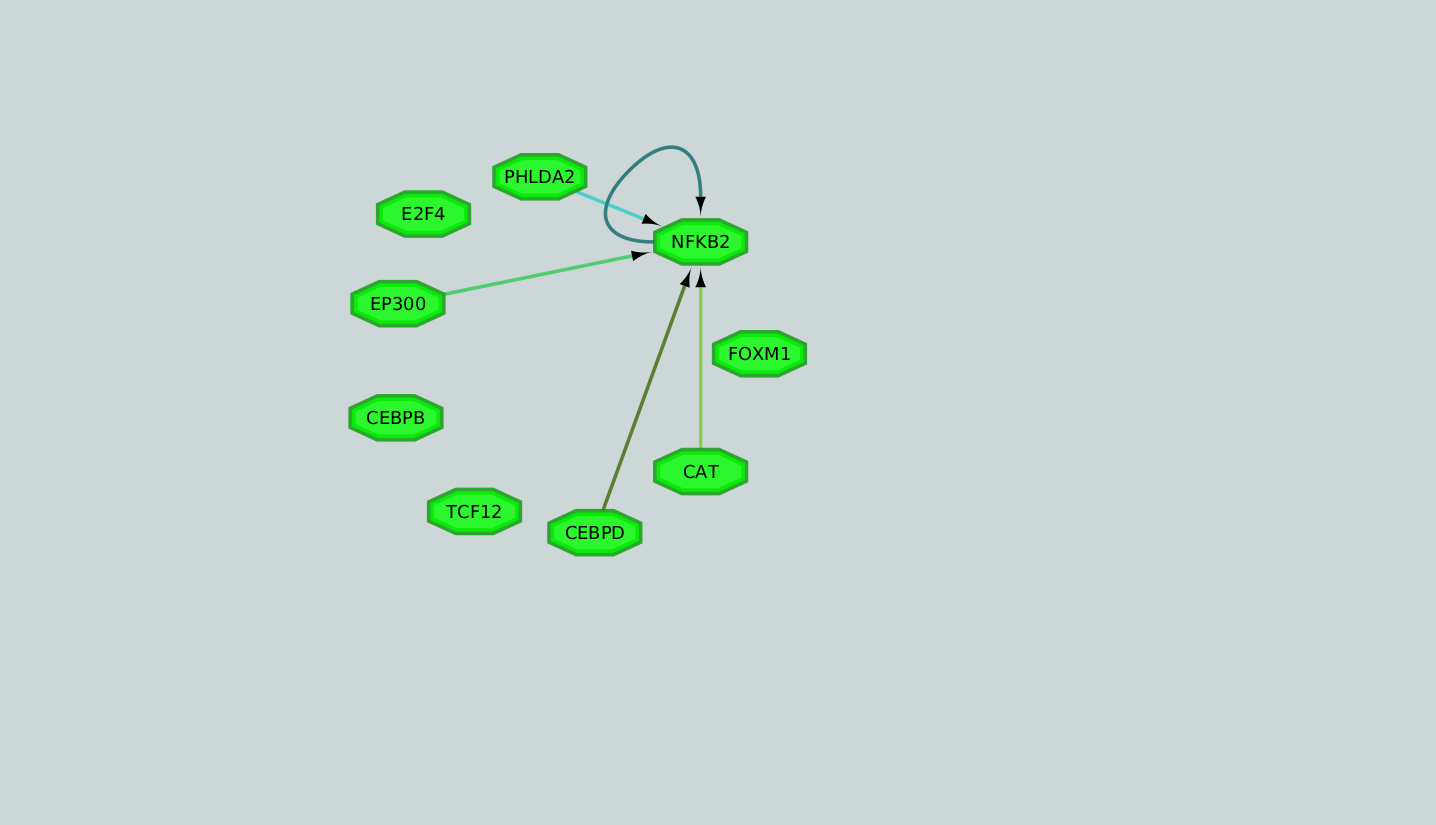

Next an overview was created filtering for all regulators and all regulated genes, which contains a lot of information, too much to extract useful information from but which shows the complexity of the immune response. The small circle at the top right corner contains the regulating genes and the big circle the regulated genes.

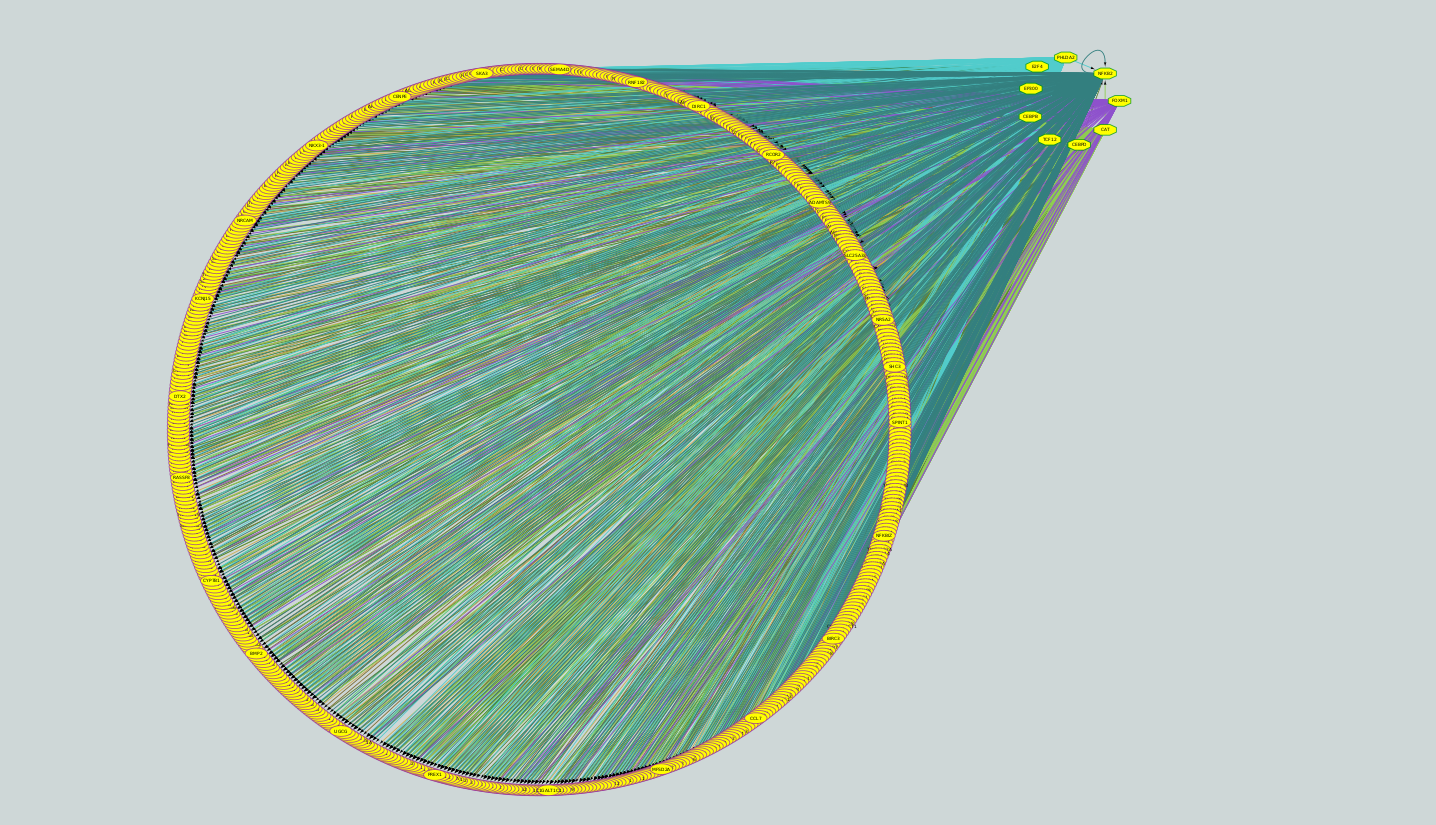

To reduce the complexity a bit the genes that were discussed earlier in this analysis and also in the paper were selected and now we can see which transcription factor is regulatring which gene. Interestingly we have IL33 nog being regulated by predicted transcription factors and we again see the centrality of NFK. The genes coloured in purple are regulated genes, the ones in green are rgulators (transcription factors). And IL33 falls outside of either category and is coloured blue.

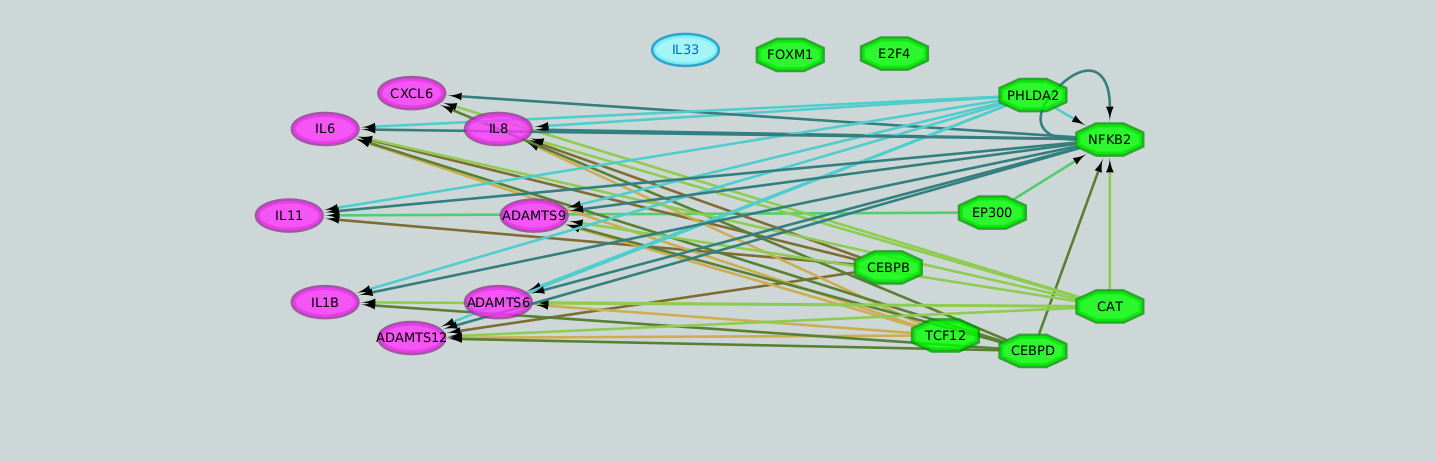

The paper mainly addressed the topic of increased cartilage damage in rheumatic athritis cells stimulated with NETS compared to rheumatic athritis cells not stimulated with NETS. The paper found that PAD2, ADAMTS4 and ADAMTS5 are upregulated in NETs stimulated cells which might be leading to increased cartilage damage but they found this via qPCR analysis and not via the RNA sequencing. We also do not see these 2 ADAMTS in the network above (which contains all genes starting with "ADAMTS" and additionaly some specific genes we saw throughout the analysis) but we see 3 other ADAMTS being upregulated and regulated by enriched transcription factors.